<h1 style="color:pink"> <u> Model Building </u></h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import itertools
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE 


In [2]:
normalized_df = pd.read_csv("normalize_cleaned_medical_data.csv")

In [3]:
normalized_df

,age,weigh,heigh,bp_sys,bp_dias,glucose,creatinin,cholesterol_total,HDL,triglycerides,...,ACR,nitrites_u,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,1.000000,0.426471,0.282051,0.311111,0.176471,0.897727,0.239583,0.78,0.384615,0.925743,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.866667,0.102941,0.076923,0.244444,0.411765,0.340909,0.312500,0.23,0.435897,0.648515,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.866667,0.044118,0.000000,0.666667,0.794118,0.829545,0.250000,0.95,0.846154,0.816832,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.800000,0.205882,0.435897,0.044444,0.088235,0.829545,0.364583,0.19,0.333333,0.118812,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.000000,0.307692,0.200000,0.294118,0.636364,0.416667,0.48,0.846154,0.366337,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,0.866667,0.014706,0.487179,0.622222,0.588235,0.477273,0.437500,0.21,0.615385,0.173267,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12363,0.800000,0.455882,0.051282,0.044444,0.058824,0.159091,0.333333,0.37,0.512821,0.900990,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12364,1.000000,0.044118,0.435897,0.088889,0.264706,0.068182,0.562500,0.31,0.307692,0.480198,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
12365,0.933333,0.529412,0.282051,0.022222,0.058824,0.295455,0.229167,0.37,0.230769,0.871287,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
data = {
    'Range': [],
    'Mean': normalized_df.mean(),
    'Std': normalized_df.std(),
}
for col in normalized_df.columns.tolist():
    data['Range'].append((normalized_df[col].min(),normalized_df[col].max()))
info = pd.DataFrame(data)
info = info.reset_index()
info.rename(columns = {'index':'Variable'}, inplace = True)
info

,Variable,Range,Mean,Std
0,age,"(0.0, 1.0)",0.697275,0.296442
1,weigh,"(0.0, 1.0)",0.497327,0.280177
2,heigh,"(0.0, 1.0)",0.498000,0.261187
3,bp_sys,"(0.0, 1.0)",0.489904,0.233304
4,bp_dias,"(0.0, 1.0)",0.505120,0.230097
5,glucose,"(0.0, 1.0)",0.503767,0.290695
6,creatinin,"(0.0, 1.0)",0.401221,0.194495
7,cholesterol_total,"(0.0, 1.0)",0.501767,0.291407
8,HDL,"(0.0, 1.0)",0.460004,0.234311
9,triglycerides,"(0.0, 1.0)",0.495317,0.287487


With the data now cleaned and analyzed, the next phase of the project is to construct models for prediction purposes. This phase involves utilizing the insights and patterns discovered from the data analysis to build accurate models that can be used for making predictions. The aim is to develop models that can effectively capture the relationships and patterns within the data, leading to accurate and trustworthy predictions.

In the modeling phase of this data science project, we will divide our approach into two parts. 

- The first part will involve using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the data and testing it using multiple algorithms. 
- The second part will involve using models that are specifically designed to address imbalanced data without the need for resampling techniques such as SMOTE. Both of these approaches will be evaluated and compared to determine the best approach for our specific use case.





### Separate the target column

In [6]:
X = normalized_df.drop("dead_5y", axis=1)
y = normalized_df["dead_5y"]

<h3 style="color:red">  First approach - SMOTE Balancing and Algorithm Performance Assessment </h3>

### Splitting the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Perform oversampling

In [8]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 155
Before OverSampling, counts of label '0': 9738 



In [9]:
df_reconstructed = pd.concat([X_train, y_train], axis=1)

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


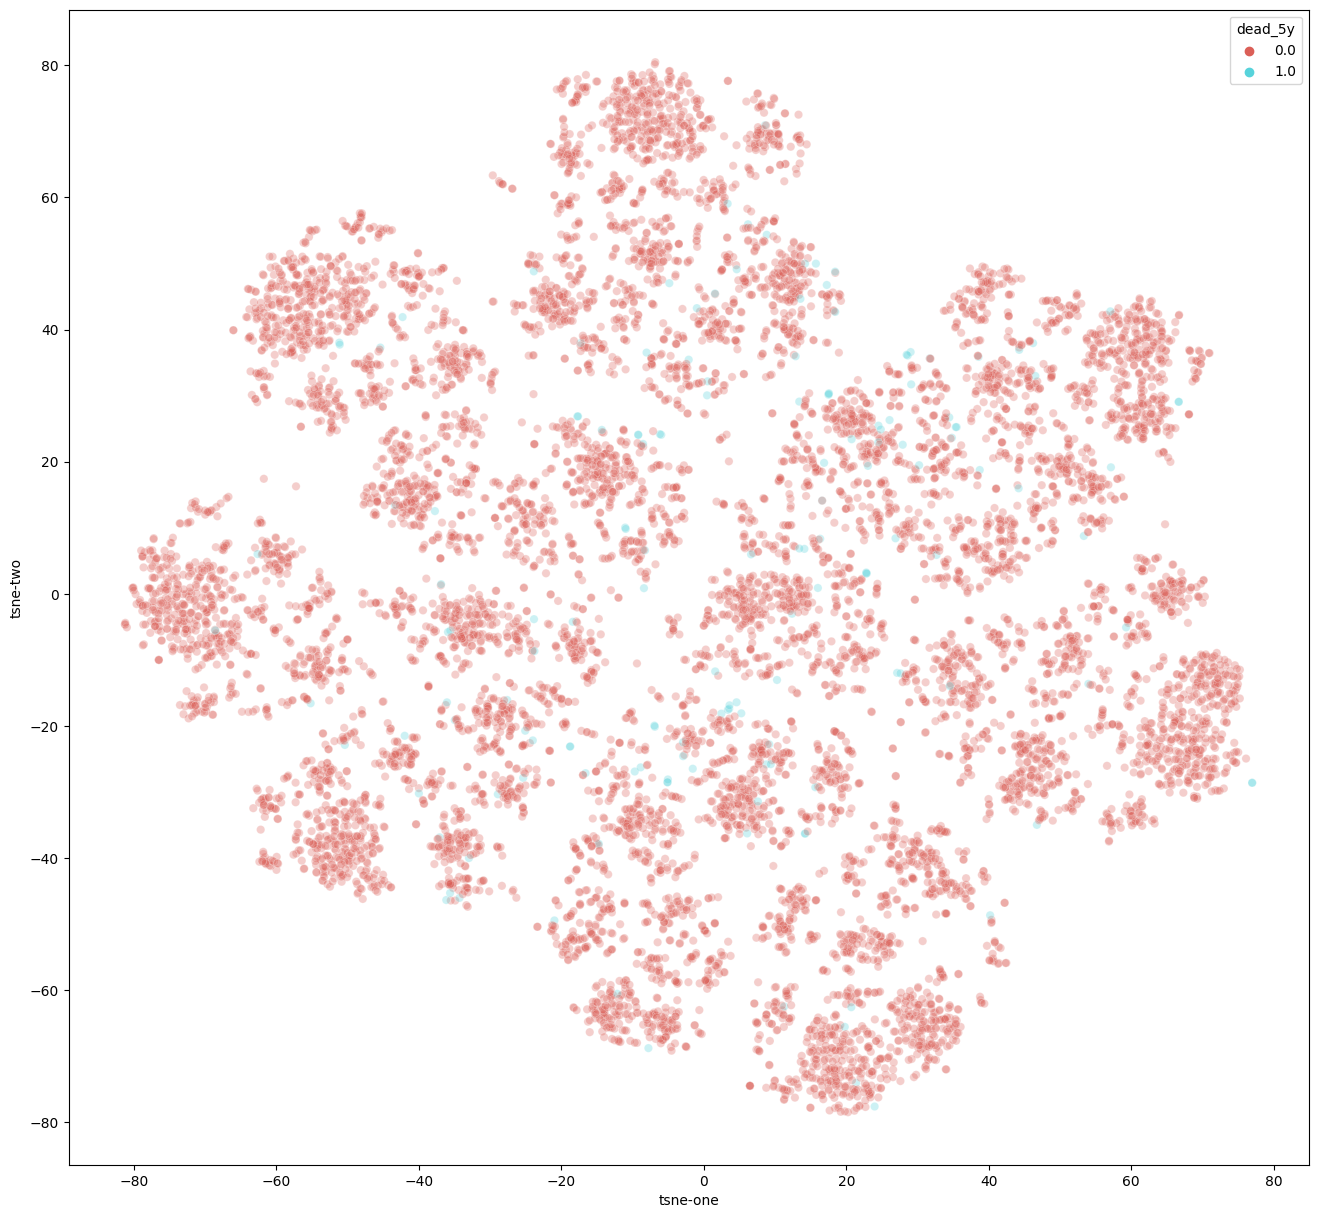

In [10]:
tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(df_reconstructed.values)
df_reconstructed['tsne-one'] = tsne_result[:,0]
df_reconstructed['tsne-two'] = tsne_result[:,1]
plt.figure(figsize=(16,15))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=df_reconstructed['dead_5y'],
    palette=sns.color_palette("hls", 2),
    data=df_reconstructed,
    legend="full",
    alpha=0.3)
df_reconstructed.drop('tsne-one', inplace=True, axis=1)
df_reconstructed.drop('tsne-two', inplace=True, axis=1)

In [11]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

After OverSampling, counts of label '1': 9738
After OverSampling, counts of label '0': 9738 



In [13]:
df_reconstructed = pd.concat([X_train, y_train], axis=1)

### t-SNE

An instance of t-SNE (t-Distributed Stochastic Neighbor Embedding) is created and the n_components parameter is set to 2, which means that the t-SNE algorithm will reduce the dimensionality of the data to 2 dimensions. The fit_transform method is used to fit the t-SNE to the data and then transform it by projecting it onto the 2-dimensional space.

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


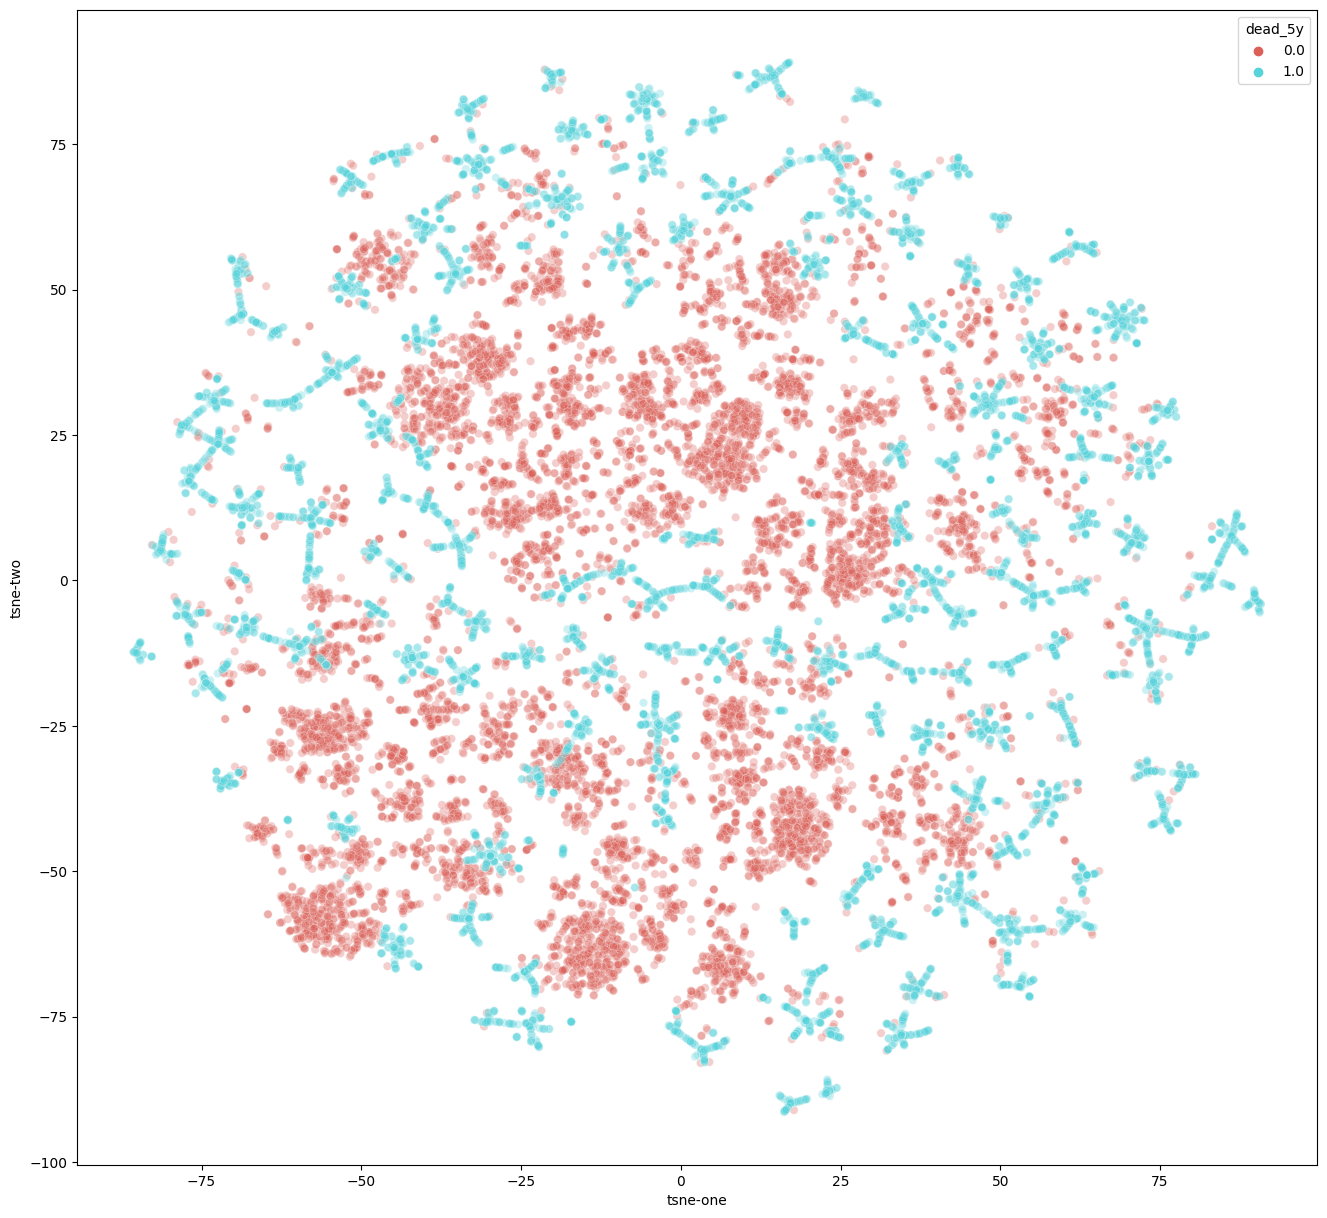

In [14]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Add the t-SNE coordinates to the dataframe
df = pd.DataFrame(X_tsne, columns=["tsne-one", "tsne-two"])
df['dead_5y'] = y_train

# Create a scatter plot of the t-SNE coordinates
plt.figure(figsize=(16, 15))
sns.scatterplot(x="tsne-one", y="tsne-two", hue=df['dead_5y'], palette=sns.color_palette("hls", 2), data=df, legend="full", alpha=0.3)
plt.show()




### Define the models to be trained

In [15]:
models = [
    KMeans(n_clusters=2, random_state=42),
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear', C=1),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
]

model_names = ['KMeans', 'LogisticRegression', 'SVC','KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']


### Perform 10-fold cross-validation with each model

In [16]:
balanced_accuracies = []
for model in models:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
        
        model.fit(X_train_kf, y_train_kf)
        y_pred_kf = model.predict(X_val_kf)
        score = balanced_accuracy_score(y_val_kf, y_pred_kf)
        scores.append(score)

###  Fit each model on the entaluate on the test set

Model: KMeans
Accuracy: 0.45311236863379145
Balanced Accuracy: 0.46172854387656703
Confusion Matrix:


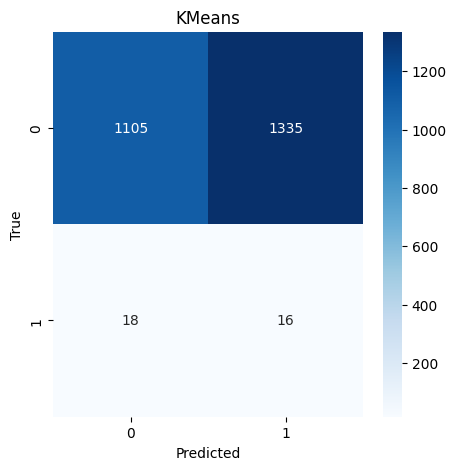

Model: LogisticRegression
Accuracy: 0.7316087308003234
Balanced Accuracy: 0.7189247830279653
Confusion Matrix:


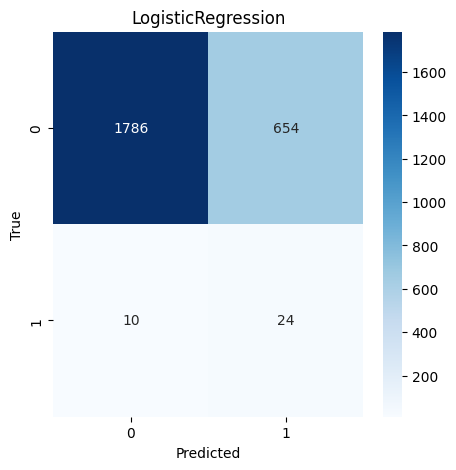

Model: SVC
Accuracy: 0.704122877930477
Balanced Accuracy: 0.7339922854387657
Confusion Matrix:


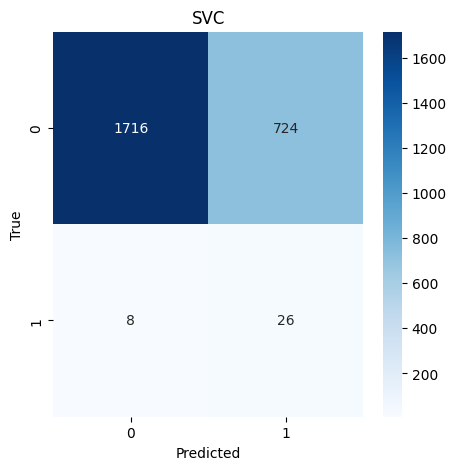

Model: KNeighborsClassifier
Accuracy: 0.8949070331447049
Balanced Accuracy: 0.5696962391513982
Confusion Matrix:


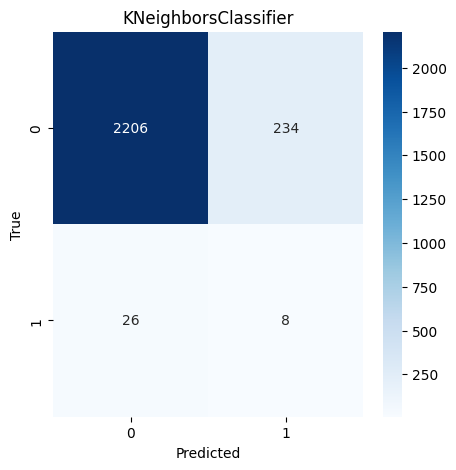

Model: DecisionTreeClassifier
Accuracy: 0.9591754244139046
Balanced Accuracy: 0.5442743490838958
Confusion Matrix:


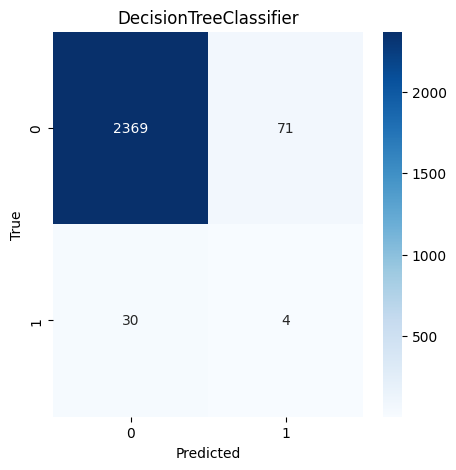

Model: RandomForestClassifier
Accuracy: 0.9854486661277284
Balanced Accuracy: 0.49959016393442623
Confusion Matrix:


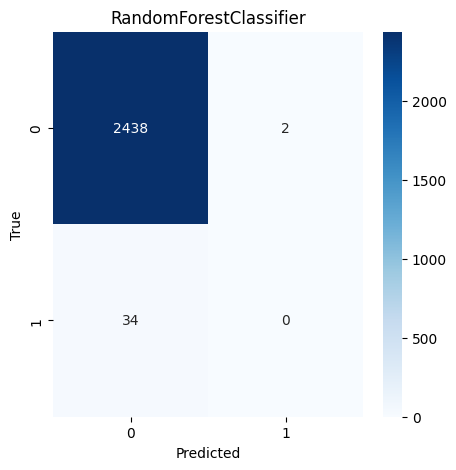

In [17]:
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    b_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracies.append(b_accuracy)

    print("Model:", model_names[i])
    print("Accuracy:", accuracy)
    print("Balanced Accuracy:", b_accuracy)
    print("Confusion Matrix:")
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model_names[i])
    plt.show()

### Plot the balanced accuracy for each model

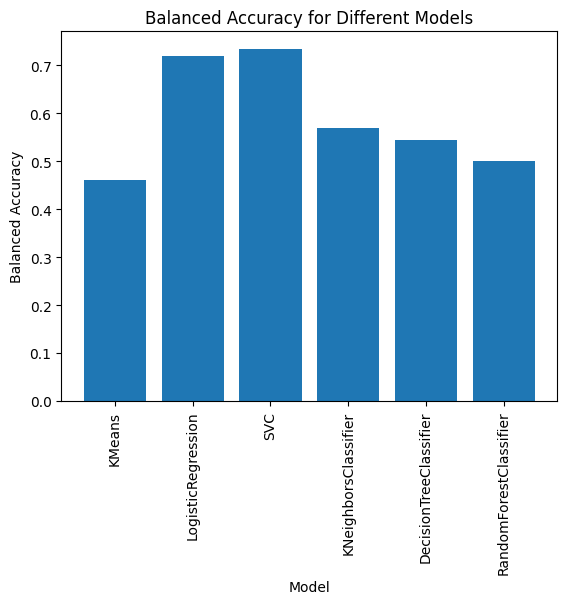

In [18]:
plt.bar(model_names, balanced_accuracies)
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy for Different Models')
plt.xticks(rotation=90)
plt.show()

<h3 style="color:red"> Second Approach - Modeling Imbalanced Data with Specialized Algorithms </h3>

### Confusion matrix plot function


In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.7089733225545675
Balanced accuracy: 0.7509522661523625


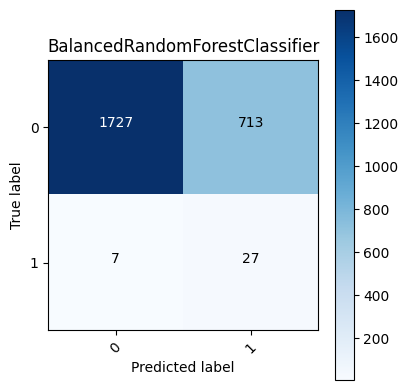

In [21]:
kf = KFold(n_splits=10)
accuracies = []
balanced_accuracies = []
cm_total = np.zeros((2, 2))

for train_index, val_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]
    y_val = y_train.iloc[val_index]
    
    tr = BalancedRandomForestClassifier(n_estimators=100)
    tr.fit(X_train_fold, y_train_fold)

tr = BalancedRandomForestClassifier(n_estimators=100)
tr.fit(X_train, y_train)
y_test_pred = tr.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy:", accuracy_test)
print("Balanced accuracy:", balanced_accuracy_test)

plot_confusion_matrix(cm_test, classes=['0', '1'], title='BalancedRandomForestClassifier')

/opt/homebrew/lib/python3.9/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Accuracy: 0.8508488278092159
Balanced accuracy: 0.7503736740597879


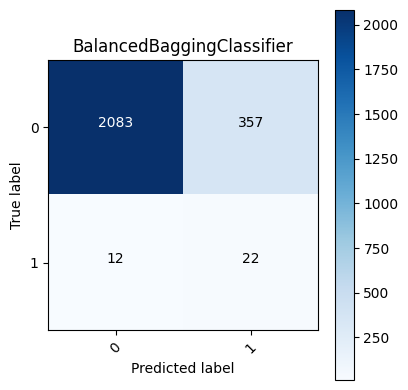

In [22]:
# train and evaluate the model
bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                 sampling_strategy='auto',
                                 replacement=False,
                                 random_state=0)
bbc.fit(X_train, y_train)

y_test_pred = bbc.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)


print("Accuracy:", accuracy_test)
print("Balanced accuracy:", balanced_accuracy_test)
plot_confusion_matrix(cm_test, classes=['0', '1'], title='BalancedBaggingClassifier')